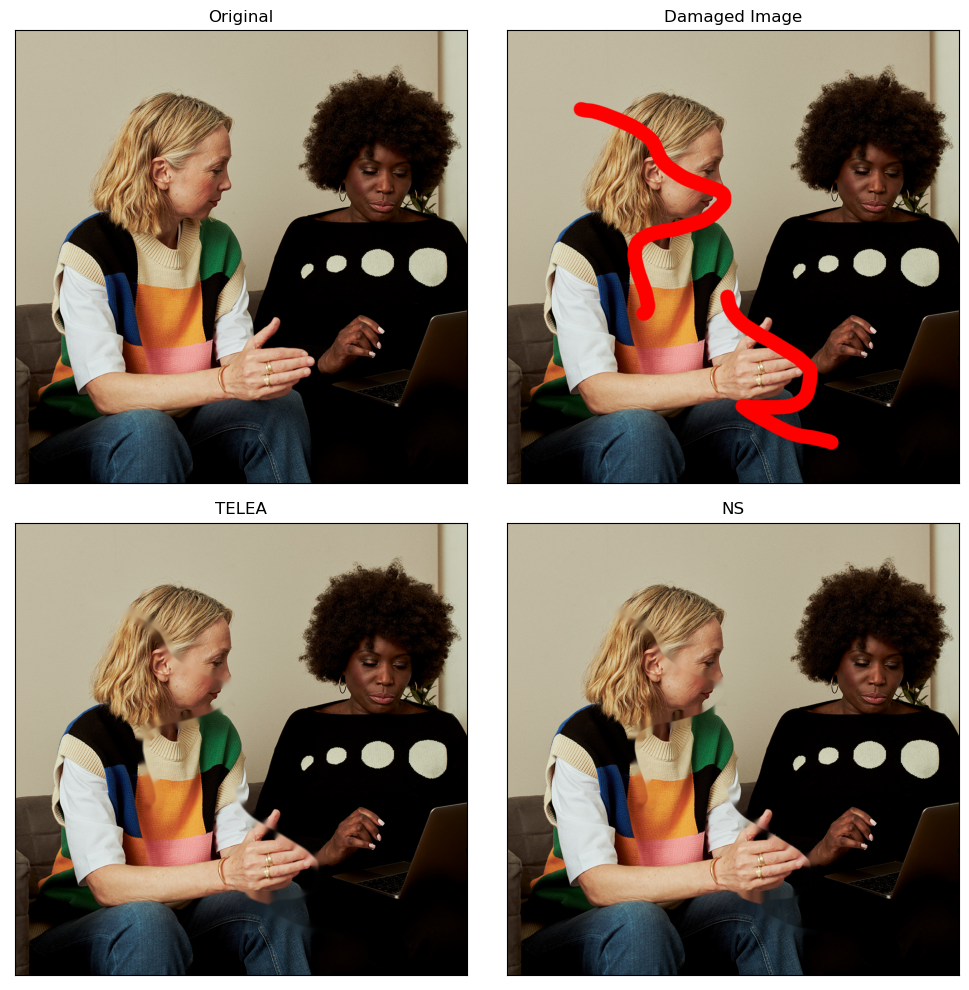

Nama File: 1.png
Metode TELEA - SSIM: 0.9744217243391045 MSE: 74.718496
Metode NS    - SSIM: 0.9748510763334223 MSE: 75.41556



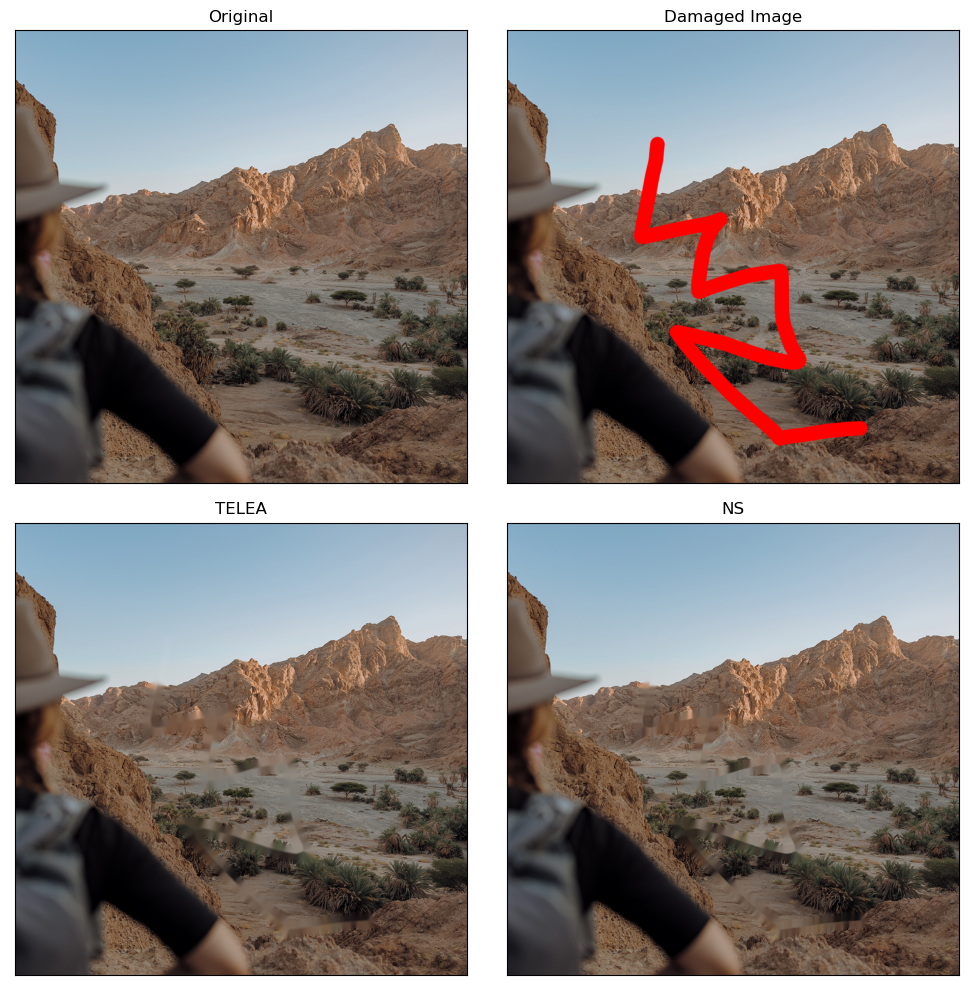

Nama File: 2.png
Metode TELEA - SSIM: 0.9650681847799383 MSE: 27.541667
Metode NS    - SSIM: 0.9647402068887022 MSE: 29.322562



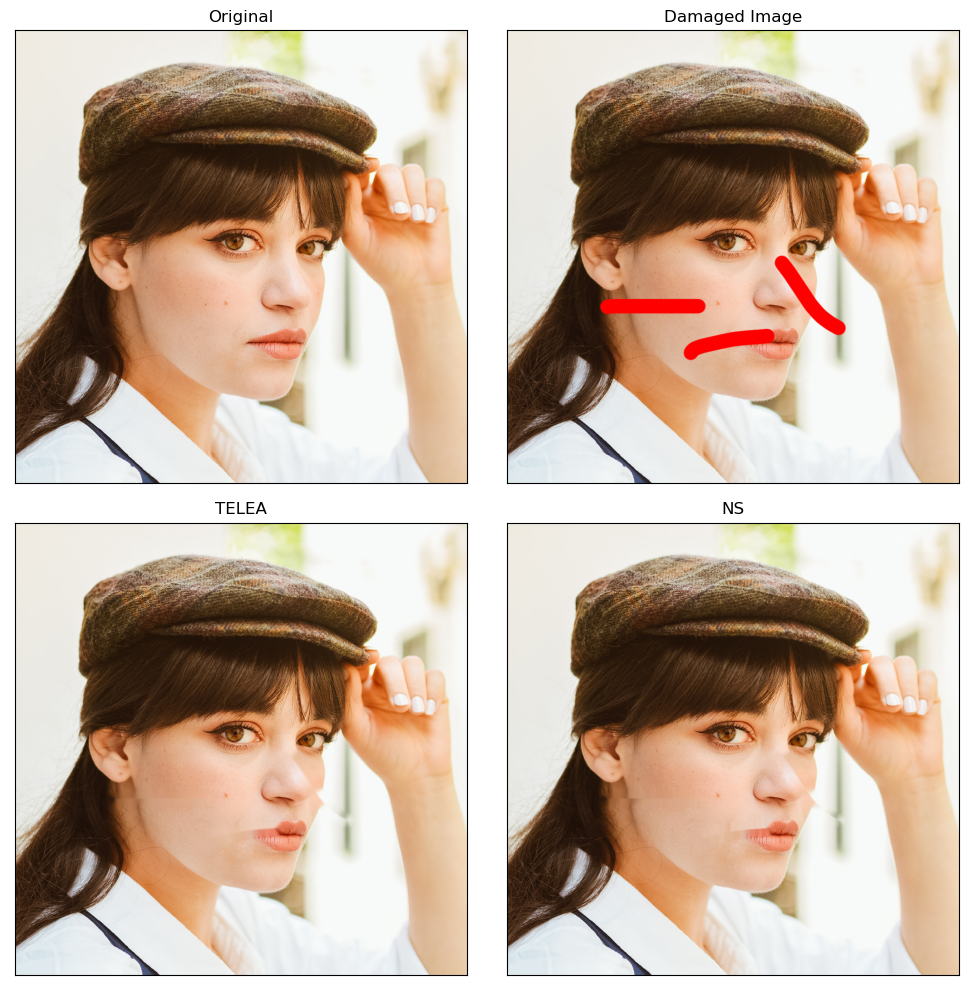

Nama File: 3.png
Metode TELEA - SSIM: 0.9957647111663174 MSE: 6.554537
Metode NS    - SSIM: 0.9957421656964375 MSE: 6.08294



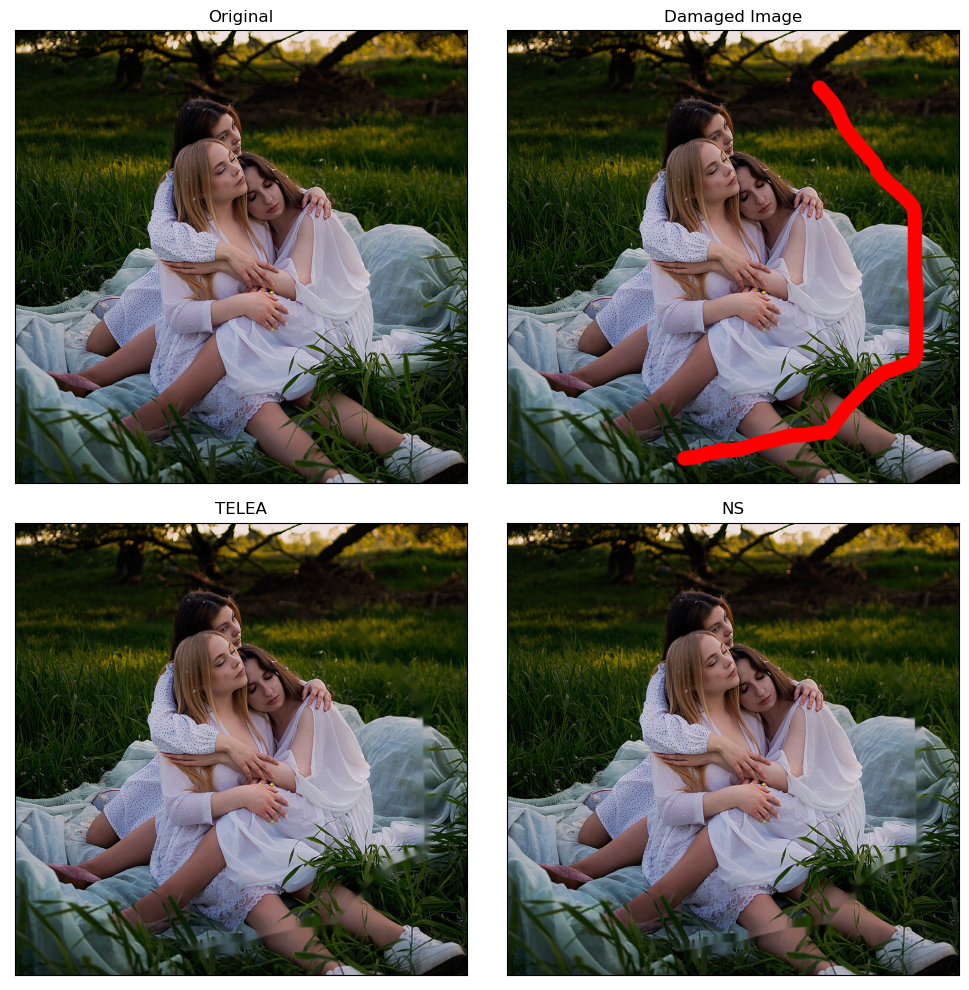

Nama File: 4.png
Metode TELEA - SSIM: 0.9802789440715157 MSE: 23.75544
Metode NS    - SSIM: 0.9796995241586647 MSE: 28.340038



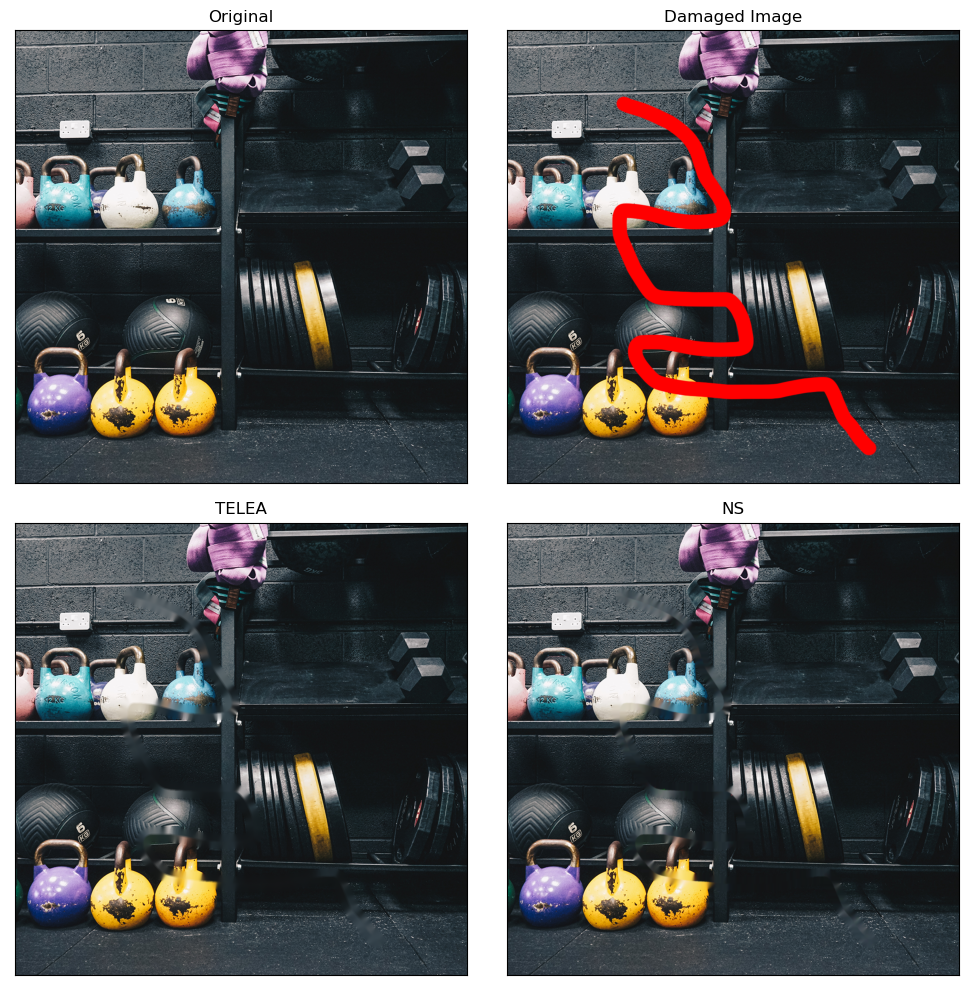

Nama File: 5.png
Metode TELEA - SSIM: 0.9682333987709808 MSE: 69.159034
Metode NS    - SSIM: 0.9682922425477836 MSE: 69.616267



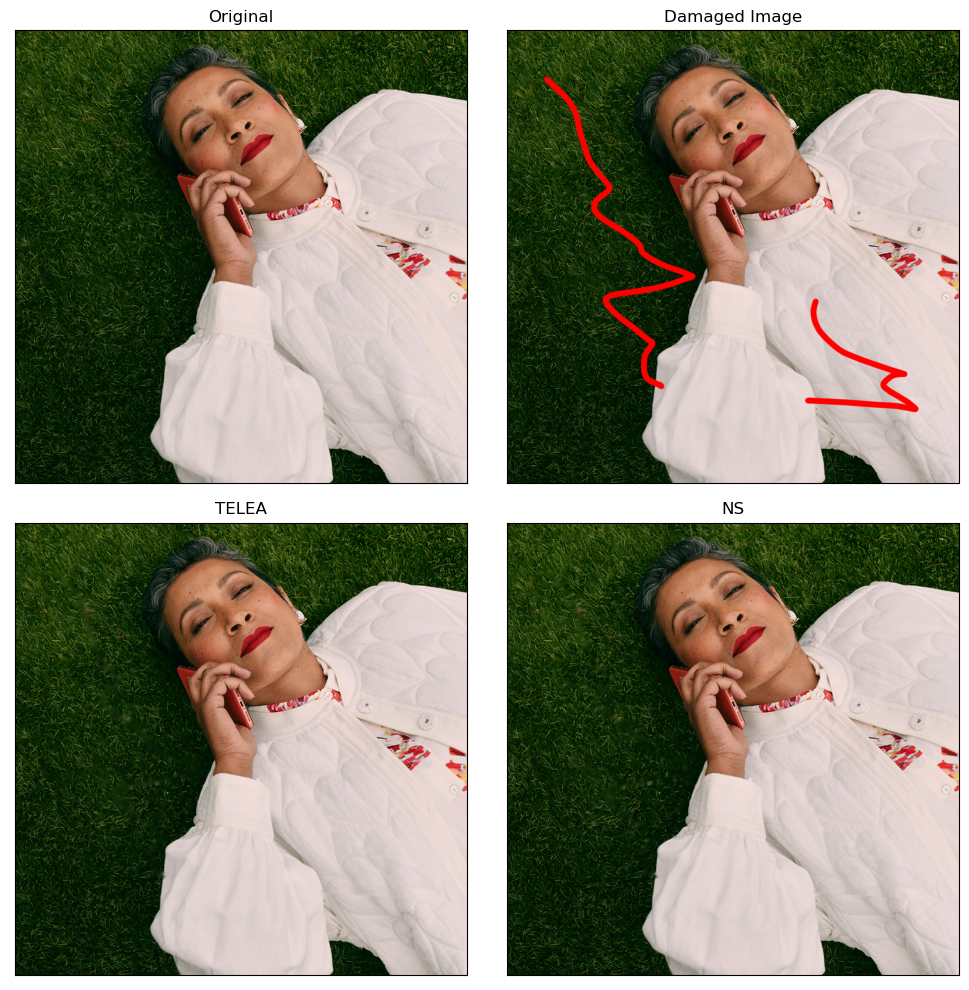

Nama File: 6.png
Metode TELEA - SSIM: 0.9878959643795631 MSE: 7.038044
Metode NS    - SSIM: 0.987706154328781 MSE: 7.63895



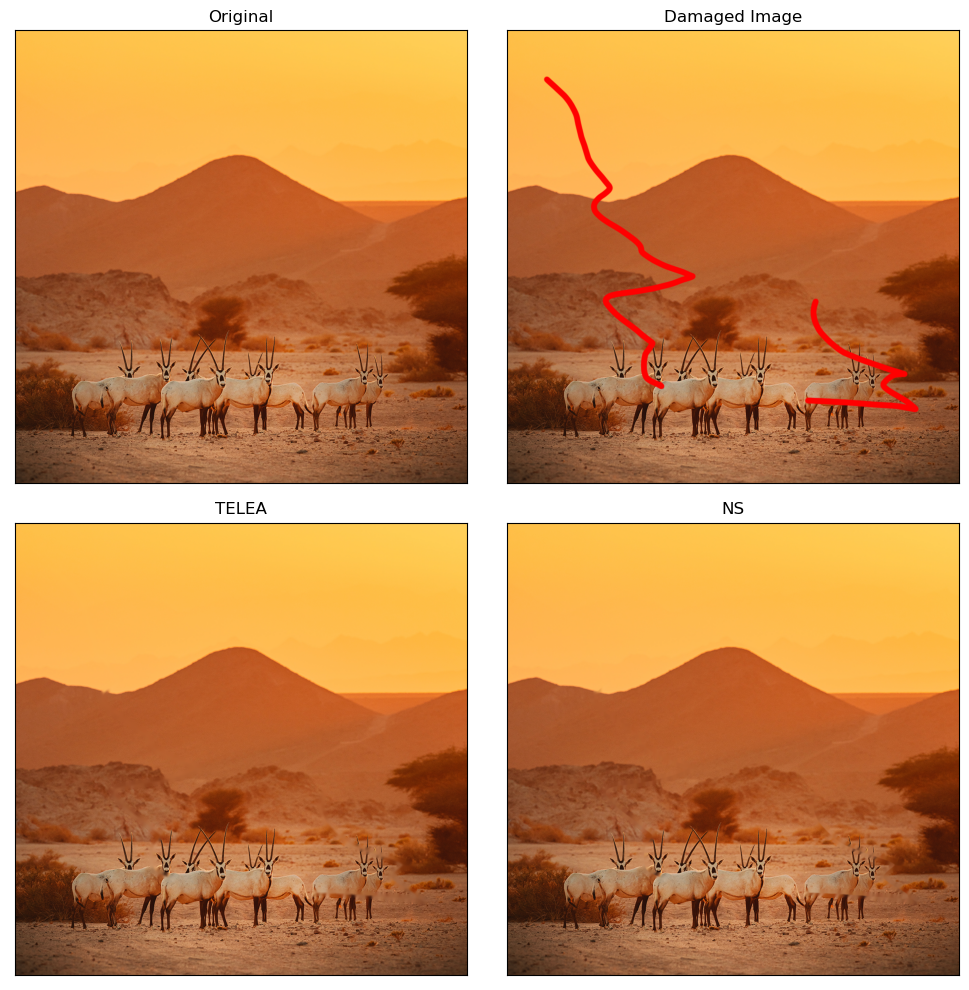

Nama File: 7.png
Metode TELEA - SSIM: 0.9927929334393683 MSE: 4.5781
Metode NS    - SSIM: 0.9927961715404761 MSE: 4.687119

Metode perbaikan terakurat: TELEA
SSIM terbaik: 0.9957647111663174
MSE terbaik: 6.554537
Metode pengerjaan paling cepat: TELEA
Waktu pengerjaan tercepat: 0.04715609550476074 detik
Inpainting selesai.


In [27]:
import cv2
import matplotlib.pyplot as plt
import os
from skimage.metrics import structural_similarity as ssim

def calculate_similarity(img1, img2):
    # Menghitung nilai SSIM antara dua gambar
    ssim_score = ssim(img1, img2, channel_axis=True)

    # Menghitung nilai MSE antara dua gambar
    mse = ((img1.astype(float) - img2.astype(float)) ** 2).mean()

    return ssim_score, mse

def main():
    original_folder = "original/"
    damage_folder = "damage/"
    mask_folder = "mask/"
    inpaint_telea_folder = "inpaint_telea/"
    inpaint_ns_folder = "inpaint_ns/"
    subplot_folder = "subplot/"

    # Membuat folder output jika belum ada
    os.makedirs(inpaint_telea_folder, exist_ok=True)
    os.makedirs(inpaint_ns_folder, exist_ok=True)
    os.makedirs(subplot_folder, exist_ok=True)

    # Mendapatkan daftar file dalam folder original
    original_files = os.listdir(original_folder)

    best_method = ""
    best_ssim = -1
    best_mse = float('inf')

    for filename in original_files:
        # Mengambil jalur lengkap untuk gambar asli, gambar rusak, dan masker
        original_path = os.path.join(original_folder, filename)
        damage_path = os.path.join(damage_folder, filename)
        mask_path = os.path.join(mask_folder, filename)

        # Membaca gambar asli, gambar rusak, dan masker
        original_img = cv2.imread(original_path, 1)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        damage_img = cv2.imread(damage_path, 1)
        damage_img = cv2.cvtColor(damage_img, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, 0)

        # Melakukan inpainting dengan metode TELEA
        output1 = cv2.inpaint(damage_img, mask, 5, cv2.INPAINT_TELEA)

        # Melakukan inpainting dengan metode NS
        output2 = cv2.inpaint(damage_img, mask, 5, cv2.INPAINT_NS)

        # Menyimpan file hasil dari perbaikan dengan metode inpaint_telea
        output1_path = os.path.join(inpaint_telea_folder, filename)
        plt.imsave(output1_path, output1)

        # Menyimpan file hasil dari perbaikan dengan metode inpaint_ns
        output2_path = os.path.join(inpaint_ns_folder, filename)
        plt.imsave(output2_path, output2)

        # Menampilkan dan menyimpan subplot
        output = [original_img, damage_img, output1, output2]
        titles = ['Original', 'Damaged Image', 'TELEA', 'NS']

        plt.figure(figsize=(10, 10))

        for i in range(4):
            plt.subplot(2, 2, i+1)
            plt.imshow(output[i])
            plt.title(titles[i])
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        subplot_path = os.path.join(subplot_folder, os.path.splitext(filename)[0] + "_subplot.png")
        plt.savefig(subplot_path)
        plt.show()

        # Membandingkan hasil inpainting dengan foto asli
        original_img_gray = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
        output1_gray = cv2.cvtColor(output1, cv2.COLOR_RGB2GRAY)
        output2_gray = cv2.cvtColor(output2, cv2.COLOR_RGB2GRAY)

        ssim1, mse1 = calculate_similarity(original_img_gray, output1_gray)
        ssim2, mse2 = calculate_similarity(original_img_gray, output2_gray)

        print("Nama File:", filename)
        print("Metode TELEA - SSIM:", ssim1, "MSE:", mse1)
        print("Metode NS    - SSIM:", ssim2, "MSE:", mse2)
        print()

        # Memilih metode perbaikan terbaik
        if ssim1 > best_ssim and mse1 < best_mse:
            best_method = "TELEA"
            best_ssim = ssim1
            best_mse = mse1
        elif ssim2 > best_ssim and mse2 < best_mse:
            best_method = "NS"
            best_ssim = ssim2
            best_mse = mse2

    print("Metode perbaikan terakurat:", best_method)
    print("SSIM terbaik:", best_ssim)
    print("MSE terbaik:", best_mse)
    print("Inpainting selesai.")

main()
